## Importing the relevant libraries 

In [45]:
import tensorflow as ts
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
import random
random.seed(10)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import warnings
warnings.filterwarnings('ignore')

## Load data set

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4678,3006-XIMLN,Female,0,No,Yes,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),94.20,193.8,Yes
6401,0807-ZABDG,Female,0,No,Yes,3,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,55.10,154.65,Yes
2976,4830-FAXFM,Male,0,No,Yes,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),24.10,439.2,No
5537,8029-XYPWT,Male,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.05,8016.6,No
1386,8060-HIWJJ,Male,0,No,No,64,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),86.55,5632.55,No


## Preprocessing

In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
no = df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

In [16]:
df.shape

(7043, 20)

In [18]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [19]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [20]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [22]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [24]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [32]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5614,0,0,1,1,68,1,1,1,1,0,...,0,1,0,0,1,0,1,0,0,0
6222,0,0,0,0,66,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
5333,1,0,1,1,13,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6809,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
571,0,1,0,0,47,1,1,0,1,0,...,1,0,0,0,0,1,1,0,0,0


In [33]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [35]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [36]:
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [37]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [38]:
len(X_train.columns)

26

## The Model

In [42]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape = (26,),activation = 'relu'),
        keras.layers.Dense(19, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.7579
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7988
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8009
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8064
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8082
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8105
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8098
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8112
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8119
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4031 - accura

In [43]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7740


[0.5108469724655151, 0.7739872336387634]

In [44]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 [==============================] - 0s 2ms/step


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.65      0.47      0.55       408

    accuracy                           0.77      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

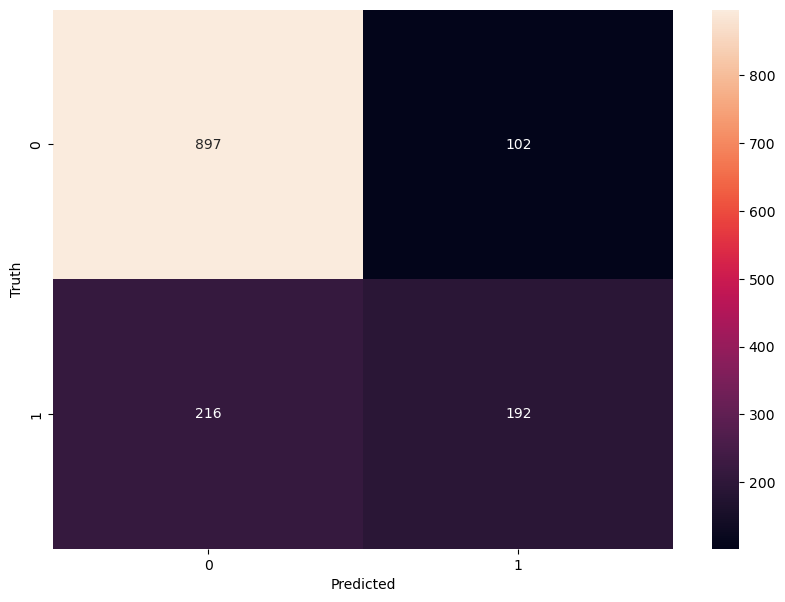

In [48]:
cm = ts.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')